### Forecasting using LSTM from Keras

Steps: 
1. Transform the dataset to make it suitable for the LSTM model, including:
    - Transforming the data to a supervised learning problem.
    - Transforming the data to be stationary.
    - Transforming the data so that it has the scale -1 to 1.
2. Fitting a stateful LSTM network model to the training data.
3. Evaluating the static LSTM model on the test data.
4. Report the performance of the forecasts.

Sources:

https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

https://machinelearningmastery.com/time-series-forecasting-supervised-learning/

In [1]:
import pandas as pd
from pandas import DataFrame, Series
from pandas import concat
import numpy as np
from LSTM_cc import *

In [2]:
cg = pd.read_csv('climate_change2013.csv',index_col='Date',parse_dates = True)
cg.index.freq='MS'

In [3]:
#SURFACE TEMPERATURE
surf_t = cg['surface_temp']
surf_t = surf_t.to_frame()

#CO2
co2 = cg['surface_temp']
co2 = co2.to_frame()

#NUMBER OF RAINY DAYS
rain_days = cg['no_of_rainy_days']
rain_days = rain_days.to_frame()

#TOTAL RAINFALL
rainfall = cg['total_rainfall']
rainfall = rainfall.to_frame()

#TOTAL HUMIDY
humidity = cg['relative_humidity']
humidity = humidity.to_frame()

#GLOBAL MEAN SEA LEVEL
gmsl = cg['GMSL(Global Mean Sea Level)']
gmsl = gmsl.to_frame()

#LAND & OCEAN ANOMALIES TEMPERATURE
land_ocean_temp = cg['Anomalies_Land_Ocean_Temperature']
land_ocean_temp = land_ocean_temp.to_frame()

#### 1) Transform Time Series to Supervised Learning

The LSTM model in Keras assumes that the data is divided into input (X) and output (y) components so i'll use the observation from the last time step (t-1) as the input and the observation at the current time step (t) as the output.

To do so i'll use the shift() function in Pandas that will push all values in a series down by a specified number places, in this case 1 place that will become the input variables. The time series as it stands will be the output variables.

Then I concatenate these two series together to create a DataFrame ready for supervised learning. The pushed-down series will have a new position at the top with no value. A NaN value will be used in this position. These NaN values will replace with 0 values, which the LSTM model will have to learn as “the start of the series” or “I have no data here,” as a month with zero observation.

### 2) Transform Time Series to Stationary

A dataset non stationary implies the presence of a structure in the data that is dependent on the time, so there is an increasing trend in the data. I need to make this data stationary because it's easy to model.

The trend can be removed from the observations, then added back to forecasts later to return the prediction to the original scale and calculate a comparable error score.

A standard way to remove a trend is by differencing the data (like i already did for the VARMA model)


----------------------------------------------------
SURFACE TEMPERATURE

In [4]:
# transform data to be stationary
raw_values = surf_t.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:] #the last 12 months (1 year) will be used for the test set
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In order to develop a robust result, i fix a number seed used by Keras to ensure the results are reproducible. So i can repeat the experiment from the previous section multiple times, then take the average RMSE as an indication of how well the configuration would be expected to perform on unseen data on average.

To do it i wrap the model fitting and walk-forward validation in a loop of fixed number of repeats (10). Each iteration the RMSE of the run can be recorded and use to summarize the distribution of RMSE scores.

            rmse
count  10.000000
mean    0.793868
std     0.187964
min     0.680388
25%     0.709908
50%     0.712275
75%     0.735098
max     1.269351


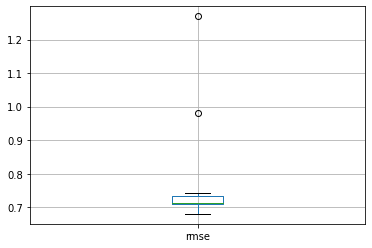

In [5]:
# summarize results
results = DataFrame()
results['rmse'] = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[0]
print(results.describe())
results.boxplot()
plt.show()

No handles with labels found to put in legend.


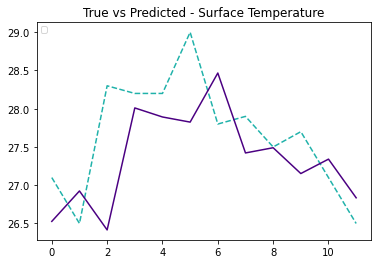

In [26]:
# line plot of observed vs predicted
pred = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[1]
plt.plot(raw_values[-12:],color = 'lightseagreen',linestyle = 'dashed')
plt.plot(pred,color = 'indigo')
plt.title('True vs Predicted - Surface Temperature')
plt.show()

------------------------------- 
CO2

            rmse
count  10.000000
mean    0.805405
std     0.217037
min     0.682959
25%     0.704336
50%     0.742269
75%     0.785598
max     1.411363


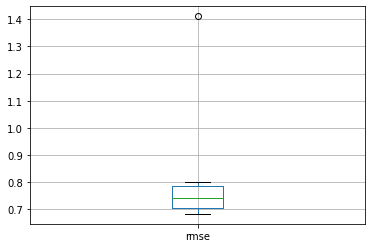

In [27]:
# transform data to be stationary
raw_values = co2.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:] #the last 12 months (1 year) will be used for the test set
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# summarize results
results = DataFrame()
results['rmse'] = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[0]
print(results.describe())
results.boxplot()
plt.show()

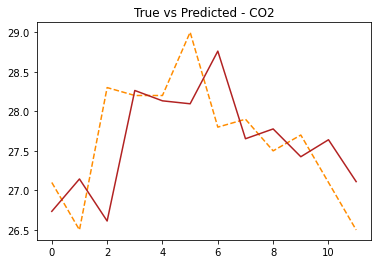

In [28]:
# line plot of observed vs predicted
pred = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[1]
plt.plot(raw_values[-12:],color = 'darkorange' ,linestyle = 'dashed')
plt.plot(pred,color = 'firebrick')
plt.title('True vs Predicted - CO2')
plt.show()

-------------------------------------
RAIN DAYS

            rmse
count  10.000000
mean    4.101657
std     0.041563
min     4.055403
25%     4.071295
50%     4.092217
75%     4.121622
max     4.180382


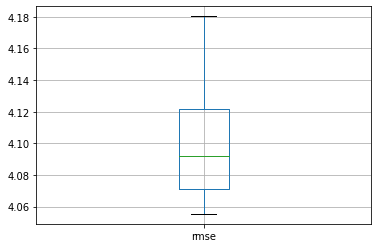

In [31]:
raw_values = rain_days.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:] #the last 12 months (1 year) will be used for the test set
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# summarize results
results = DataFrame()
results['rmse'] = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[0]
print(results.describe())
results.boxplot()
plt.show()

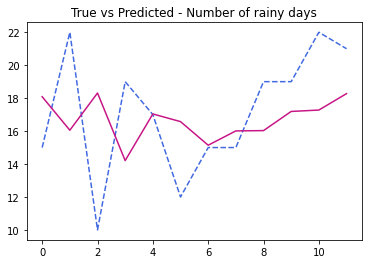

In [32]:
pred = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[1]
plt.plot(raw_values[-12:],color = 'royalblue' ,linestyle = 'dashed')
plt.plot(pred,color = 'mediumvioletred')
plt.title('True vs Predicted - Number of rainy days')
plt.show()

--------------------------------
TOTAL RAINFALL

             rmse
count   10.000000
mean    99.787389
std     33.042340
min     85.924821
25%     88.819972
50%     89.692086
75%     90.340277
max    193.712772


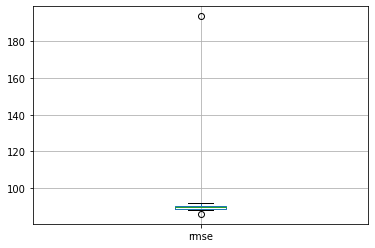

In [33]:
raw_values = rainfall.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:] #the last 12 months (1 year) will be used for the test set
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# summarize results
results = DataFrame()
results['rmse'] = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[0]
print(results.describe())
results.boxplot()
plt.show()

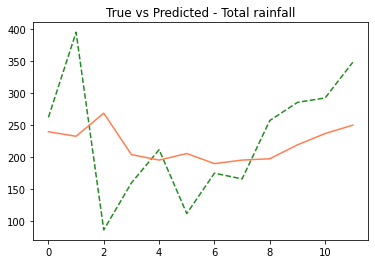

In [34]:
pred = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[1]
plt.plot(raw_values[-12:],color = 'forestgreen' ,linestyle = 'dashed')
plt.plot(pred,color = 'coral')
plt.title('True vs Predicted - Total rainfall')
plt.show()

---------------------------------
HUMIDITY

            rmse
count  10.000000
mean    0.037129
std     0.000572
min     0.036278
25%     0.036820
50%     0.036989
75%     0.037354
max     0.038343


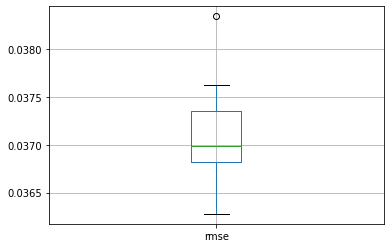

In [36]:
raw_values = humidity.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:] #the last 12 months (1 year) will be used for the test set
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# summarize results
results = DataFrame()
results['rmse'] = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[0]
print(results.describe())
results.boxplot()
plt.show()

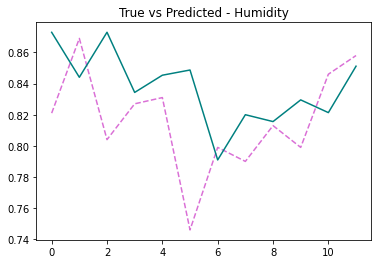

In [37]:
pred = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[1]
plt.plot(raw_values[-12:],color = 'orchid' ,linestyle = 'dashed')
plt.plot(pred,color = 'teal')
plt.title('True vs Predicted - Humidity')
plt.show()

-------------------------------
GLOBAL MEAN SEA LEVEL

            rmse
count  10.000000
mean    3.319070
std     0.130863
min     3.108636
25%     3.260321
50%     3.309312
75%     3.404918
max     3.539761


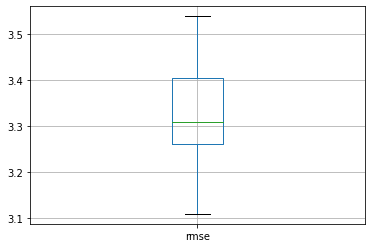

In [38]:
raw_values = gmsl.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:] #the last 12 months (1 year) will be used for the test set
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# summarize results
results = DataFrame()
results['rmse'] = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[0]
print(results.describe())
results.boxplot()
plt.show()

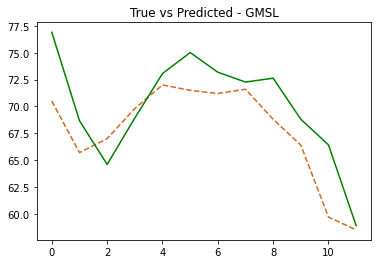

In [39]:
pred = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[1]
plt.plot(raw_values[-12:],color = 'chocolate' ,linestyle = 'dashed')
plt.plot(pred,color = 'green')
plt.title('True vs Predicted - GMSL')
plt.show()

----------------------------
LAND & OCEAN ANOMALIES TEMPERATURES

            rmse
count  10.000000
mean    0.081028
std     0.000881
min     0.079345
25%     0.080841
50%     0.081168
75%     0.081607
max     0.082042


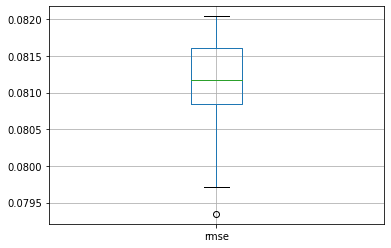

In [40]:
raw_values = land_ocean_temp.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:] #the last 12 months (1 year) will be used for the test set
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# summarize results
results = DataFrame()
results['rmse'] = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[0]
print(results.describe())
results.boxplot()
plt.show()

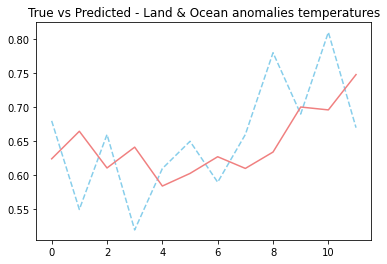

In [41]:
pred = robust_lstm(train_scaled,test_scaled,scaler,raw_values)[1]
plt.plot(raw_values[-12:],color = 'skyblue' ,linestyle = 'dashed')
plt.plot(pred,color = 'lightcoral')
plt.title('True vs Predicted - Land & Ocean anomalies temperatures')
plt.show()